In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [126]:
dataset = os.listdir("C:\MyWork\MyLearning\Career Growth\ML\Files\DataSet\Image_Dataset")

In [127]:
print(dataset)

['Buffalo', 'Fish', 'Pigeon']


In [128]:
print("Animals Types:",len(dataset))

Animals Types: 3


In [129]:
dataset_Buffalo = os.listdir("C:\MyWork\MyLearning\Career Growth\ML\Files\DataSet\Image_Dataset\Buffalo")
dataset_Fish = os.listdir("C:\MyWork\MyLearning\Career Growth\ML\Files\DataSet\Image_Dataset\Fish")
dataset_Pigeon = os.listdir("C:\MyWork\MyLearning\Career Growth\ML\Files\DataSet\Image_Dataset\Pigeon")

In [130]:
animals = []

for b in dataset_Buffalo:
    #animals.append("{0}\{1}".format("C:\MyWork\MyLearning\Career Growth\ML\Files\DataSet\Image_Dataset\Buffalo",b))
    animals.append(('Buffalo',"{0}\{1}".format("C:\MyWork\MyLearning\Career Growth\ML\Files\DataSet\Image_Dataset\Buffalo",b)))

for f in dataset_Fish:
    #animals.append("{0}\{1}".format("C:\MyWork\MyLearning\Career Growth\ML\Files\DataSet\Image_Dataset\Fish",f))
    animals.append(('Fish',"{0}\{1}".format("C:\MyWork\MyLearning\Career Growth\ML\Files\DataSet\Image_Dataset\Fish",f)))
    
for p in dataset_Pigeon:
    #animals.append("{0}\{1}".format("C:\MyWork\MyLearning\Career Growth\ML\Files\DataSet\Image_Dataset\Pigeon",p))
    animals.append(('Pigeon',"{0}\{1}".format("C:\MyWork\MyLearning\Career Growth\ML\Files\DataSet\Image_Dataset\Pigeon",p)))
    

In [131]:
df = pd.DataFrame(animals,columns=['Animals','Path'])

In [135]:
df.head()

,Animals,Path
0,Buffalo,C:\MyWork\MyLearning\Career Growth\ML\Files\Da...
1,Buffalo,C:\MyWork\MyLearning\Career Growth\ML\Files\Da...
2,Buffalo,C:\MyWork\MyLearning\Career Growth\ML\Files\Da...
3,Buffalo,C:\MyWork\MyLearning\Career Growth\ML\Files\Da...
4,Buffalo,C:\MyWork\MyLearning\Career Growth\ML\Files\Da...


In [136]:
df.shape

(94, 2)

In [137]:
df['Path'][0]

'C:\\MyWork\\MyLearning\\Career Growth\\ML\\Files\\DataSet\\Image_Dataset\\Buffalo\\Buffalo1.jfif'

In [139]:
df['Animals'].value_counts()

Pigeon     34
Fish       31
Buffalo    29
Name: Animals, dtype: int64

In [141]:
animal_types = ['Buffalo', 'Fish', 'Pigeon']

In [175]:
import cv2

im_size = 300

path = "C:\\MyWork\\MyLearning\\Career Growth\\ML\\Files\\DataSet\\Image_Dataset\\"


images = []
labels = []

for i in animal_types:
    data_path = path + i
    
    filenames = [i for i in os.listdir(data_path)]
    
    for f in filenames:
        img = cv2.imread(data_path + "/" + f)
        img = cv2.resize(img,(im_size,im_size))
        
        images.append(img)
        labels.append(i)

In [176]:
images[0]

array([[[225, 232, 217],
        [225, 232, 217],
        [225, 232, 217],
        ...,
        [221, 215, 202],
        [221, 215, 202],
        [221, 215, 202]],

       [[225, 232, 217],
        [225, 232, 217],
        [225, 232, 217],
        ...,
        [221, 215, 202],
        [221, 215, 202],
        [221, 215, 202]],

       [[225, 232, 217],
        [225, 232, 217],
        [225, 232, 217],
        ...,
        [221, 215, 202],
        [221, 215, 202],
        [221, 215, 202]],

       ...,

       [[ 81, 115, 121],
        [ 78, 112, 118],
        [ 80, 116, 122],
        ...,
        [ 87, 130, 133],
        [ 87, 130, 133],
        [ 87, 130, 133]],

       [[ 82, 115, 121],
        [ 79, 112, 118],
        [ 82, 116, 122],
        ...,
        [ 87, 130, 133],
        [ 87, 130, 133],
        [ 87, 130, 133]],

       [[ 83, 115, 121],
        [ 80, 112, 118],
        [ 83, 116, 122],
        ...,
        [ 87, 130, 133],
        [ 87, 130, 133],
        [ 87, 130, 133]]

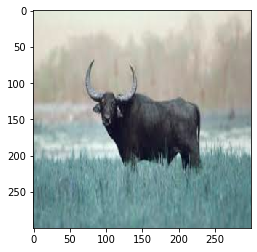

In [177]:
plt.imshow(images[0])

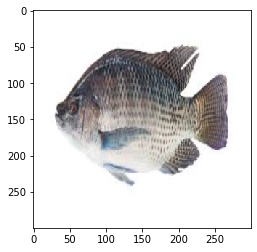

In [178]:
plt.imshow(images[56])

In [179]:
images = np.array(images)

images.shape

(94, 300, 300, 3)

In [180]:
images = images.astype('float32') / 255.0

In [181]:
images.shape

(94, 300, 300, 3)

In [185]:
y = df['Animals'].values

print(y[:15])

['Buffalo' 'Buffalo' 'Buffalo' 'Buffalo' 'Buffalo' 'Buffalo' 'Buffalo'
 'Buffalo' 'Buffalo' 'Buffalo' 'Buffalo' 'Buffalo' 'Buffalo' 'Buffalo'
 'Buffalo']


In [186]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

y_labelencoded = LabelEncoder()
y = y_labelencoded.fit_transform(y)

In [188]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [189]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

images,y = shuffle(images,y,random_state = 1)

In [191]:
X_train,X_test,y_train,y_test = train_test_split(images,y,test_size = 0.05,random_state = 415)

In [193]:
print(X_train.shape)

(89, 300, 300, 3)


In [194]:
print(X_test.shape)

(5, 300, 300, 3)


In [197]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten


model = Sequential()
model.add(Flatten(input_shape = (300,300,3)))
model.add(Dense(256,activation = 'tanh'))
model.add(Dense(3,activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [198]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 270000)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               69120256  
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 771       
Total params: 69,121,027
Trainable params: 69,121,027
Non-trainable params: 0
_________________________________________________________________


In [199]:
model.compile(optimizer='Adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [200]:
model.fit(X_train,y_train,epochs=5)

Train on 89 samples
Epoch 1/5
89/89 [==============================] - 1s 13ms/sample - loss: 11.1514 - acc: 0.2584
Epoch 2/5
89/89 [==============================] - 1s 12ms/sample - loss: 14.2581 - acc: 0.3146
Epoch 3/5
89/89 [==============================] - 1s 11ms/sample - loss: 13.2959 - acc: 0.3146
Epoch 4/5
89/89 [==============================] - 1s 10ms/sample - loss: 12.2916 - acc: 0.3146
Epoch 5/5
89/89 [==============================] - 1s 10ms/sample - loss: 11.2431 - acc: 0.3146


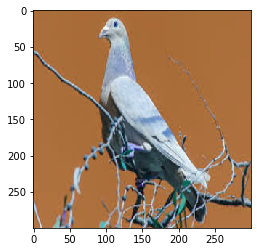

In [203]:
plt.imshow(X_test[0])

In [218]:
model.predict_classes(X_test)

array([0, 0, 0, 0, 0], dtype=int64)